# Proyek analisis data : E-Commerce Public Dataset
- **nama** = Muhammad Zharfan
- **email** = zharfantea17@gmail.com
- **ID Dicoding** = muhammadzharfan17



## Menyiapkan library yang diperlukan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Menentukan Pertanyaan Bisnis
- Bagaimana tren penjualan bulanan di berbagai kategori produk?
- Kategori produk manakah yang menghasilkan rata-rata penjualan tertinggi?


## Data Wrangling

### Gathering Data 

In [2]:
order_payments_df= pd.read_csv("https://raw.githubusercontent.com/nightowl17/Final_Project_Data_Analysis_Muhammad_Zharfan/refs/heads/main/Data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [3]:
order_reviews_df= pd.read_csv("https://raw.githubusercontent.com/nightowl17/Final_Project_Data_Analysis_Muhammad_Zharfan/refs/heads/main/Data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [4]:
orders_df= pd.read_csv("https://raw.githubusercontent.com/nightowl17/Final_Project_Data_Analysis_Muhammad_Zharfan/refs/heads/main/Data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
product_category_name_translation_df= pd.read_csv("https://raw.githubusercontent.com/nightowl17/Final_Project_Data_Analysis_Muhammad_Zharfan/refs/heads/main/Data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [6]:
products_df= pd.read_csv("https://raw.githubusercontent.com/nightowl17/Final_Project_Data_Analysis_Muhammad_Zharfan/refs/heads/main/Data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
sellers_df= pd.read_csv("https://raw.githubusercontent.com/nightowl17/Final_Project_Data_Analysis_Muhammad_Zharfan/refs/heads/main/Data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
customers_df= pd.read_csv("https://raw.githubusercontent.com/nightowl17/Final_Project_Data_Analysis_Muhammad_Zharfan/refs/heads/main/Data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
order_items_df= pd.read_csv("https://raw.githubusercontent.com/nightowl17/Final_Project_Data_Analysis_Muhammad_Zharfan/refs/heads/main/Data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
geolocation_df= pd.read_csv("https://raw.githubusercontent.com/nightowl17/Final_Project_Data_Analysis_Muhammad_Zharfan/refs/heads/main/Data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assessing Data

1. Assessing order payments dataset

In [11]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [12]:
order_payments_df.duplicated().sum()

0

In [13]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Terdapat outlier pada kolom payment_valu berdasarkan data yang ada 13664 itu tidak mungkin(very unlikely)

2. Assessing order reviews dataset

In [14]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [15]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [16]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


3. Assessing orders dataset

In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [19]:
orders_df.duplicated().sum()

0

In [20]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Terdapat data kosong dalam beberapa kolom dalam tabel

4. Assessing product category name translation dataset

In [21]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [22]:
product_category_name_translation_df.duplicated().sum()

0

In [23]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [24]:
product_category_name_translation_df.duplicated().sum()

0

5. Assessing product dataset

In [25]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [26]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [27]:
products_df.duplicated().sum()

0

In [28]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [29]:
products_df.duplicated().sum()

0

6. assessing sellers dataset

In [30]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [31]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [32]:
sellers_df.duplicated().sum()

0

7. Assessing customers dataset 

In [33]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [34]:
customers_df.duplicated().sum()

0

In [35]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


8. Assessing order items dataset

In [36]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [37]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [38]:
order_items_df.duplicated().sum()

0

9. Assessing geolocation dataset

In [39]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [40]:
geolocation_df.duplicated().sum()

261831

In [41]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### SUMMARY OF DATA WRANGLING PROBLEMS 

DATA TO CLEAN:

1. order payments:
none

2. order reviews:
- Missing values dalam kolom review comment tittle dan message
- data type for order creation and answer timestamp

3. orders:
- missing values dalam kolom delivered_carrier_date, delivered_customer_date, dan estimated_delivery_date
- ganti tipe data dalam 3 kolom tsb

4. product category name translations:
none

5. products: 
- missing value product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm,
     product_height_cm, dan product_width_cm

6. sellers:
- data type for zipcode prefix shouldn't be int

7. customers:
- data type for zipcode prefix shouldn't be int

8. order item:
none

9. geolocation:
- duplicated data


### Cleaning Data (skipping the unproblematic dataset (labeled none))

1. cleaning data for order_reviews_df, to do list:
   - mengisi missing value dalam review_comment_tittle dengan "no tittle"
   - mengisi missing value dalam review_comment_tittle dengan "no message"
   - mengganti data type review creation date dan answer timestamp

In [42]:
order_reviews_df.isna().sum()


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [43]:
# mengisi missing values dalam review_commment_title dengan "No Title"
order_reviews_df['review_comment_title'].fillna("No Title", inplace=True)


In [44]:
# mengisi missing values dalam review_comment_message dengan "No Message"

order_reviews_df['review_comment_message'].fillna("No Message", inplace=True)


In [45]:
order_reviews_df.isna().sum()


review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [46]:
#ganti datatype untuk review_creation_date dan review_answer_timestamp menjadi datetime
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [47]:
order_reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [48]:
order_reviews_df.head(5)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Message,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Message,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Message,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


2. cleaning data for orders_df, to do list:
   - mengganti datatype order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,
     dan order_estimated_delivery_date menjadi datetime
   - mengisi missing value dalam order_approved_at, order_delivered_carrier_date, order_delivered_customer_date dengan metode interpolate
   

In [49]:
#ganti datatype untuk order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, 
#dan order_estimated_delivery_date menjadi datetime

datetime_columns_orders = ["order_approved_at","order_purchase_timestamp", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns_orders:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [50]:
orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [51]:
orders_df.isna().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [52]:
# Interpolate untuk setiap kolom, note: mengikuti dokumentasi dalam modul cleaning data
orders_df.order_approved_at.interpolate(method='linear', limit_direction='forward', inplace=True)
orders_df.order_delivered_carrier_date.interpolate(method='linear', limit_direction='forward',inplace=True)
orders_df.order_delivered_customer_date.interpolate(method='linear', limit_direction='forward',inplace=True)


In [53]:
orders_df.isna().sum()


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [54]:
orders_df.head(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


3. cleaning data for products_df, to do list:
   - mengisi missing value dalam product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm,
     product_height_cm, dan product_width_cm dengan nilai mean dari masing masing kolom
   - mengisi missingvalu untuk kolom kategorikal product_category_name dengan nilai modus/mode
   

In [55]:
products_df.isna().sum()


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [56]:
products_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [57]:
#mengisi missing values yang memiliki datatype float dengan rata-rata (mean) dari kolom masing masing
products_df.product_weight_g.fillna(products_df.product_weight_g.mean(), inplace=True)
products_df.product_length_cm.fillna(products_df.product_length_cm.mean(), inplace=True)
products_df.product_height_cm.fillna(products_df.product_height_cm.mean(), inplace=True)
products_df.product_width_cm.fillna(products_df.product_width_cm.mean(), inplace=True)
products_df.product_name_lenght.fillna(products_df.product_name_lenght.mean(), inplace=True)
products_df.product_description_lenght.fillna(products_df.product_description_lenght.mean(), inplace=True)
products_df.product_photos_qty.fillna(products_df.product_photos_qty.mean(), inplace=True)


In [58]:
products_df.product_category_name.value_counts()


product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [59]:
#mengisi missing values untuk kolom kategorikal product_category_name dengan nilai mode/modus dalam kolom tsb
products_df.product_category_name.fillna(value="cama_mesa_banho", inplace=True)


In [60]:
products_df.isna().sum()


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

4. cleaning data for sellers_df, to do list:
   - mengganti datatype zipcode prefix menjadi object
   

In [61]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [62]:
#mengubah datatype untuk kolom seller_zip_code_prefix dari int ke str
sellers_df.seller_zip_code_prefix = sellers_df.seller_zip_code_prefix.astype(str)


In [63]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


5. cleaning data for customers_df, to do list:
   - mengganti datatype zipcode prefix menjadi object
   

In [64]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [65]:
#mengubah datatype untuk kolom customer_zip_code_prefix dari int ke str
customers_df.customer_zip_code_prefix = customers_df.customer_zip_code_prefix.astype(str)


In [66]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


6. cleaning data for geolocation_df, to do list:
   - menghapus duplikat data
   

In [67]:
geolocation_df[geolocation_df.duplicated()]


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [68]:
#menghapus data duplikat
geolocation_df.drop_duplicates(inplace=True)


In [69]:
geolocation_df.geolocation_zip_code_prefix = geolocation_df.geolocation_zip_code_prefix.astype(str)


In [70]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  object 
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), object(3)
memory usage: 33.8+ MB


In [71]:
geolocation_df.duplicated().sum()

0

### SUMMARY OF CLEANING DATA

terdapat total 6 data yang dibersihkan:
1. order_review_df
   - mengisi missing value dalam review_comment_tittle dengan "no tittle"✅
   - mengisi missing value dalam review_comment_tittle dengan "no message"✅
   - mengganti data type review creation date dan answer timestamp✅
    
2. orders_df:
   - mengganti datatype order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,
     dan order_estimated_delivery_date menjadi datetime✅
   - mengisi missing value dalam order_approved_at, order_delivered_carrier_date, order_delivered_customer_date dengan metode interpolate✅
     
3. products_df:
   - mengisi missing value dalam product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm,
     product_height_cm, dan product_width_cm dengan nilai mean dari masing masing kolom✅
   - mengisi missingvalu untuk kolom kategorikal product_category_name dengan nilai modus/mode✅
    
4. sellers_df:
   - mengganti datatype zipcode prefix menjadi object✅

5. customers_df:
   - mengganti datatype zipcode prefix menjadi object✅

6. geolocation_df:
   - menghapus duplikat data✅


## Exploratory Data Analysis (EDA)



### explore order_payments

In [72]:
order_payments_df.describe(include="all")


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [73]:
#summary statistik untuk payment value dan payment installments
order_payments_df[['payment_value', 'payment_installments']].describe()


,payment_value,payment_installments
count,103886.000000,103886.000000
mean,154.100380,2.853349
std,217.494064,2.687051
min,0.000000,0.000000
25%,56.790000,1.000000
50%,100.000000,1.000000
75%,171.837500,4.000000
max,13664.080000,24.000000


In [74]:
#payment type yang paling banyak digunakan
order_payments_df.payment_type.value_counts()


payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

### Explore order_reviews

In [75]:
order_payments_df.describe(include="all")


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [76]:
order_reviews_df.review_score.describe()


count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

In [77]:
#jumlah score review dengan urutan jumlah
order_reviews_df.review_score.value_counts()


review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

### Explore orders_df

In [78]:
orders_df.describe(include="all")


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:03:07.926630144,2018-01-04 22:48:17.780608768,2018-01-14 13:40:17.743410688,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:24:49,2017-09-18 20:12:22,2017-09-27 16:44:29,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:14:21,2018-01-24 11:04:02,2018-02-02 13:58:38,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 19:34:23,2018-05-07 19:09:00,2018-05-15 07:31:50,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [79]:
orders_df['order_status'].value_counts()


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [80]:
#menentukan waktu pengiriman dengan satuan harian menggunakan dt.days
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_approved_at"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)




In [81]:
orders_df.sample(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
41547,38d544a25d70fdf56f6630a9bcf7f82d,3d0ddc15f0b45855c923fe2881dd47ee,delivered,2017-12-13 21:01:12,2017-12-13 21:10:51,2018-01-25 00:12:29,2018-02-08 00:32:48,2018-02-08,56.0
36076,dddf3072374a44f4645fcfd6367ee77d,10e4b0b508006611dc99698dd5521b51,delivered,2017-10-06 15:34:13,2017-10-06 15:49:29,2017-10-09 20:43:05,2017-10-20 23:43:35,2017-11-03,14.0
51035,48139821eca38783cb43c48d98c0246d,fa4806deb2b4135ae3708a87c6279302,delivered,2017-05-02 18:52:57,2017-05-03 15:55:28,2017-05-04 15:21:16,2017-05-15 15:53:47,2017-05-31,12.0
11126,b9ec77884b9b01c77b08f954cbc97fd4,4cca2bdc9a6f0f9238b80a80ff1b30e1,delivered,2017-07-26 16:38:46,2017-07-26 16:50:23,2017-08-02 22:32:29,2017-08-04 18:13:44,2017-08-08,9.0
32121,88d3ffbd9471d0ba780fd0370a0d7892,773b672fa164724437f6e8b82b6e0f06,delivered,2018-07-05 16:50:26,2018-07-06 16:51:17,2018-07-13 11:18:00,2018-07-26 20:54:27,2018-08-07,20.0


### Explore product_category_name_translation_df

In [82]:
product_category_name_translation_df.product_category_name_english.value_counts().head()


product_category_name_english
health_beauty                1
food                         1
fashion_sport                1
fashion_underwear_beach      1
construction_tools_safety    1
Name: count, dtype: int64

### Explore products_df

In [83]:
#summary statistik dimensi produk
products_df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].describe()


,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4281.908773,16.913945,13.637140,12.078681
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


### Explore sellers_df

In [84]:
sellers_df[['seller_id', 'seller_zip_code_prefix']].nunique()


seller_id                 3095
seller_zip_code_prefix    2246
dtype: int64

In [85]:
sellers_df.seller_city.value_counts().head()


seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
Name: count, dtype: int64

In [86]:
sellers_df.seller_state.value_counts().head()


seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
Name: count, dtype: int64

### Explore Customer_df

In [87]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


In [88]:
customers_df[['customer_id','customer_zip_code_prefix']].nunique()


customer_id                 99441
customer_zip_code_prefix    14994
dtype: int64

In [89]:
customers_df.customer_city.value_counts().head()


customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: count, dtype: int64

In [90]:
customers_df.customer_state.value_counts().head()


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: count, dtype: int64

### explore order_items_df

In [91]:
order_items_df[['price', 'freight_value']].describe()


,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [92]:
order_items_df[['order_id', 'product_id', 'seller_id']].nunique()


order_id      98666
product_id    32951
seller_id      3095
dtype: int64

### explore geolocation_df

In [93]:
geolocation_df[['geolocation_lat', 'geolocation_lng']].describe()

,geolocation_lat,geolocation_lng
count,738332.000000,738332.000000
mean,-20.998353,-46.461098
std,5.892315,4.393705
min,-36.605374,-101.466766
25%,-23.603061,-48.867822
50%,-22.873588,-46.647278
75%,-19.923336,-43.836974
max,45.065933,121.105394


In [94]:
geolocation_df.geolocation_city.value_counts().head()


geolocation_city
sao paulo         79927
rio de janeiro    35177
são paulo         19718
belo horizonte    19474
curitiba          11263
Name: count, dtype: int64

In [95]:
geolocation_df.geolocation_state.value_counts().head()


geolocation_state
SP    285976
MG    101353
RJ     78836
RS     48093
PR     45059
Name: count, dtype: int64

### Explore customer_df dan order_df

In [96]:
customer_order_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_order_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,9.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,17.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,25.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,15.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,11.0


In [97]:
customer_order_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,96096,14994,4119,27,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,17,142,15540,41746,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:03:07.926629632,2018-01-04 22:48:17.780608512,2018-01-14 13:40:17.743410688,2018-01-24 03:08:37.730111232,13.765660
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-491.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:24:49,2017-09-18 20:12:22,2017-09-27 16:44:29,2017-10-03 00:00:00,6.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:14:21,2018-01-24 11:04:02,2018-02-02 13:58:38,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 19:34:23,2018-05-07 19:09:00,2018-05-15 07:31:50,2018-05-25 00:00:00,15.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,634.000000


In [98]:
customer_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  object        
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99441 non-null  datetime64[ns]
 9   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 10  order_delivered_customer_date  99441 non-null  datetime64[ns]
 11  order_estimated

In [99]:

customer_order_df.groupby(by="customer_city").agg({
    "customer_id": "nunique",
    "customer_city":"nunique",
    "delivery_time": ["min", "max"]
}).sample(5)
     

customer_id customer_city delivery_time       
                    nunique       nunique           min    max
customer_city                                                 
camacho                   1             1           8.0    8.0
coronel freitas           1             1           8.0    8.0
luminarias                3             1          13.0   16.0
orindiuva                 5             1           7.0   19.0
pindamonhangaba         101             1        -250.0  142.0

### Explore order_items_df and products_df


In [100]:
orderitem_products_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
orderitem_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [101]:
#pivot tabel berdasarkan product_category_name untuk melihat total harga (price) berdasarkan total berat produk (product_weight_g) dan jumlah pembelian per kategori produk(order_id)
orderitem_products_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "product_weight_g": "sum",
    "price": "sum"
}).sample(5)
     

,order_id,product_weight_g,price
product_category_name,,,
portateis_cozinha_e_preparadores_de_alimentos,14,42575.0,3968.53
moveis_escritorio,1273,19261258.0,273960.70
industria_comercio_e_negocios,235,1785859.0,39669.61
flores,29,60550.0,1110.04
artigos_de_natal,128,289738.0,8800.82


### Explore order_payments_df and order_reviews_df

In [102]:
opayment_oreview_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
opayment_oreview_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Title,No Message,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No Title,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Title,No Message,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Title,No Message,2017-12-21,2017-12-22 01:10:39


In [103]:

opayment_oreview_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":"mean",
    "payment_installments":"sum" , 
    "review_score": "mean"
}).sample(5)

,order_id,payment_value,payment_installments,review_score
payment_type,,,,
debit_card,1528,142.396569,1536,4.168084
credit_card,76505,163.140977,271151,4.087637
not_defined,3,0.000000,3,1.666667
voucher,3866,65.499655,5830,4.003804
boleto,19784,144.986413,19910,4.086631


### combining dataframe for multivariate analysis

In [104]:
#menggabungkan customer_order_df dengan opayment_oreview_df
half_merge_df = pd.merge(
    left=customer_order_df,
    right=opayment_oreview_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
half_merge_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


In [105]:
#menggabungkan half_merge_df (dari cell sebelumnya) dengan orderitem_products_df
rest_half_df= pd.merge(
    left=half_merge_df,
    right=orderitem_products_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
rest_half_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [106]:
#menggabungkan rest_half_df (dari cell sebelumnya) dengan sellers_df

all_df= pd.merge(
    left=rest_half_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940,ibitinga,SP


In [107]:
#menunjukan rata rata harga berdasarkan lokasi
average_order_value_by_location = all_df.groupby(['customer_zip_code_prefix', 'customer_city', 'customer_state'])['price'].mean().reset_index()
average_order_value_by_location.sort_values(by='price', ascending=False, inplace=True)
average_order_value_by_location.head(10)

,customer_zip_code_prefix,customer_city,customer_state,price
5683,38447,araguari,MG,2399.00
3211,2635,sao paulo,SP,2300.00
8811,58765,pianco,PB,2200.00
10262,68618,nova esperanca do piria,PA,2199.00
12222,79906,ponta pora,MS,2062.99
9250,61809,pacatuba,CE,2015.00
11776,77818,araguaina,TO,1999.00
5830,39363,engenheiro navarro,MG,1997.00
8183,55495,agrestina,PE,1989.00
12586,83829,fazenda rio grande,PR,1890.00


In [108]:
#menunjukan kepuasan pengiriman barang dengan membandingkan rata rata waktu pengiriman dengan rata rata rating
delivery_satisfaction_analysis = all_df.groupby('order_status').agg(
    mean_delivery_time=('delivery_time', 'mean'),
    mean_review_score=('review_score', 'mean')
).reset_index()

delivery_satisfaction_analysis.head()

,order_status,mean_delivery_time,mean_review_score
0,approved,460.333333,2.000000
1,canceled,32.166667,1.824658
2,created,8.400000,2.333333
3,delivered,11.986347,4.080568
4,invoiced,90.841270,1.650538


In [109]:
#menunjukan distribusi penjualan berdasarkan negara bagian
sales_distribution = all_df.groupby(['product_category_name', 'customer_state'])['price'].sum().reset_index()
sales_distribution.head()

,product_category_name,customer_state,price
0,agro_industria_e_comercio,AL,1476.30
1,agro_industria_e_comercio,AP,589.99
2,agro_industria_e_comercio,BA,2257.00
3,agro_industria_e_comercio,CE,452.90
4,agro_industria_e_comercio,ES,442.30


### SUMMARY OF Exploratory data analysis 

1. order payments:
data ini berisi detail pembayaran seperti order IDs, payment types, installments, dan payment values. payment values rata-rata dan jumlah installment dirangkum menggunakan metode describe() yang menunjukan praktik pembayaran umum. terdapat juga detail jenis pembayaran yang menunjukkan metode mana (misalnya kartu kredit, boleto dll) yang paling sering digunakan.

2. order reviews:
 data ini berisi skor review dan komentar untuk setiap pesanan. Skor review rata-rata dan distribusi skor ditujukan, dengan sebagian besar ulasan berada dalam kisaran menengah atau tinggi.

3. orders:
 data ini berisi status pesanan, beberapa detail waktu, dan detail pengiriman. delivery time (dihitung sebagai selisih antara tanggal persetujuan pengiriman dan tanggal pengiriman) menunjukkan variasi yang luas, dengan beberapa pesanan memerlukan waktu penyelesaian yang jauh lebih lama. Mayoritas pesanan terdapat pada kategori terkirim atau dibatalkan.

4. product category name translations:
data ini berisi terrjemahan nama kategori produk dari bahasa Portugis ke bahasa Inggris. ditampilkannya beberapa kategori nama dalam bahasa inggris untuk memperlihatkan contoh dari kategori produk yang berada.

5. products: 
data ini berisi ID produk, nama kategori, dan dimensi (berat, panjang, tinggi, lebar). rangkuman statistik untuk dimensi produk menunjukkan beragam ukuran produk. 

6. sellers:
data ini memberikan informasi tentang ID penjual, kode pos, kota, dan state. Jumlah ID penjual unik dan kode pos menunjukkan seberapa banyak keragaman geografis penjual, sedangkan kota dan negara bagian teratas diidentifikasi berdasarkan jumlah frekuensi dengan sao paulo dan SP memiliki sellers terbanyak.

7. customers:
data ini berisi informasi tentang ID pelanggan, kode pos, kota, dan state. Sebagian besar pelanggan berasal dari  kota Sao paulo dan state SP, seperti yang ditunjukkan oleh penghitungan nilai. Jumlah pelanggan dan kode pos yang unik menyoroti variasi wilayah yang dilayani.


8. order item:
data ini berisi ID pesanan, ID produk, ID penjual, harga, dan nilai pengiriman. rangkuman statistik untuk price dan freight_value menunjukkan kisaran biaya umum dan biaya pengiriman yang terkait dengan pesanan. Keunikan ID pesanan, ID seller dan ID produk menunjukkan keragaman item yang dibeli.

9. geolocation:
data ini berisi data geografis seperti kode pos, latitude, langitude, kota, dan state. rangkuman statistik menunjukkan penyebaran latitude dan longitude, memberikan wawasan tentang penyebaran geografis pelanggan dan penjual. Kota dan negara bagian yang paling umum dapat diidentifikasi berdasarkan jumlah frekuensi yaitu Sau Paulo dan SP

10. customer_order_df:
 data gabungan ini beriisi detail tentang pelanggan, seperti ID unik, lokasi, negara bagian,  informasi pesanan ,  status pesanan, order timestamp, status, pengiriman, dan perkiraan tanggal pengiriman. dibuatnya kolom baru delivery_time yang menunjukkan jumlah hari antara pengiriman pesanan dan perkiraan pengirimannya. ditunjukkan juga pivot table data waktu pengiriman untuk pelanggan dari berbagai kota. Ini menunjukkan jumlah pelanggan unik (customer_id) dan kota (custoomer_city), serta waktu pengiriman minimum dan maksimum untuk setiap kota. Misalnya, di Termas de Ibira, terdapat 1 pelanggan unik dengan waktu pengiriman 15 hari, sedangkan di Iturama, 15 pelanggan unik mengalami waktu pengiriman berkisar antara 6 hingga 75 hari.

11. orderitem_products_df:
data gabungan ini berisikan kolom id produk, id seller, id order, price, freight value, dll. dibuat juga pivot table berdasaarkan kategori produk yang menunjukan jumlah order produk, jumlah berat(gram) dan jumlah harga . contohnya misalnya kategori "pcs" memiliki 181 pesanan unik dengan total berat produk kurang lebih 1.465.010 gram dan total penjualan 222.963,13

12. opayment_oreview_df:
data gabungan ini merupakan gabungan dari order_payment_df dan order_review_df yang berisi kolom seperti order id, tipe pembayaran, payment value, cicilan, dll. dibuat juga pivot table yang menunjukan apakah payment value dan cicilan dapat mempengaruhi rating. hasilnya kartu kredit adalah yang paling banyak digunakan, dengan 76.505 pesanan, nilai pembayaran rata-rata 163.14, dan total cicilan 271.151, dipasangkan dengan skor ulasan rata-rata 4.09. Boleto adalah yang terpopuler kedua, dengan 19.784 pesanan, nilai pembayaran rata-rata 144.99, dan 19.910 cicilan, juga mempertahankan skor ulasan 4.09. Kartu debit, meskipun lebih jarang digunakan (1.528 pesanan), memiliki skor ulasan rata-rata yang sedikit lebih tinggi yaitu 4.17. Pembayaran voucher, dengan nilai pembayaran rata-rata lebih rendah sebesar 65.50, masih mendapatkan skor ulasan yang solid sebesar 4.00.

13. half_merge_df , rest_half_df, dan all_df
proses merge dilakukan dengan 3 step tersebut agar mempermudah penyatuan data akhirnya data yang digunakan adalah all_df yang berisikan seluruh data yang dibutuhkan. dibuat 3 pivot table, pertama pivot table yang berisi kan rata rata harga berdasarkan lokasi, kedua pivot table yang menunjukkan kepuasan pengiriman barang dengan membandingkan rata rata waktu pengiriman dengan rata rata rating, ketiga pivot table yang menunjukan distribusi penjualan berdasarkan negara bagian.
 

## Visualization dan Explanatory analysis

### Bagaimana tren penjualan bulanan di berbagai kategori produk?
cell dibawah akan menunjukkan tren penjualan perbulan beserta dengan line chart

In [110]:
all_df['order_month'] = all_df['order_purchase_timestamp'].dt.to_period('M')

monthly_sales_trend = all_df.groupby(['order_month', 'product_category_name'])['price'].sum().reset_index()
monthly_sales_trend.sort_values(by='price', ascending=False, inplace=True)

monthly_sales_trend.head()

,order_month,product_category_name,price
1060,2018-05,relogios_presentes,125788.46
1207,2018-08,beleza_saude,123448.50
1076,2018-06,beleza_saude,110025.34
1141,2018-07,beleza_saude,108797.08
623,2017-11,cama_mesa_banho,108300.86


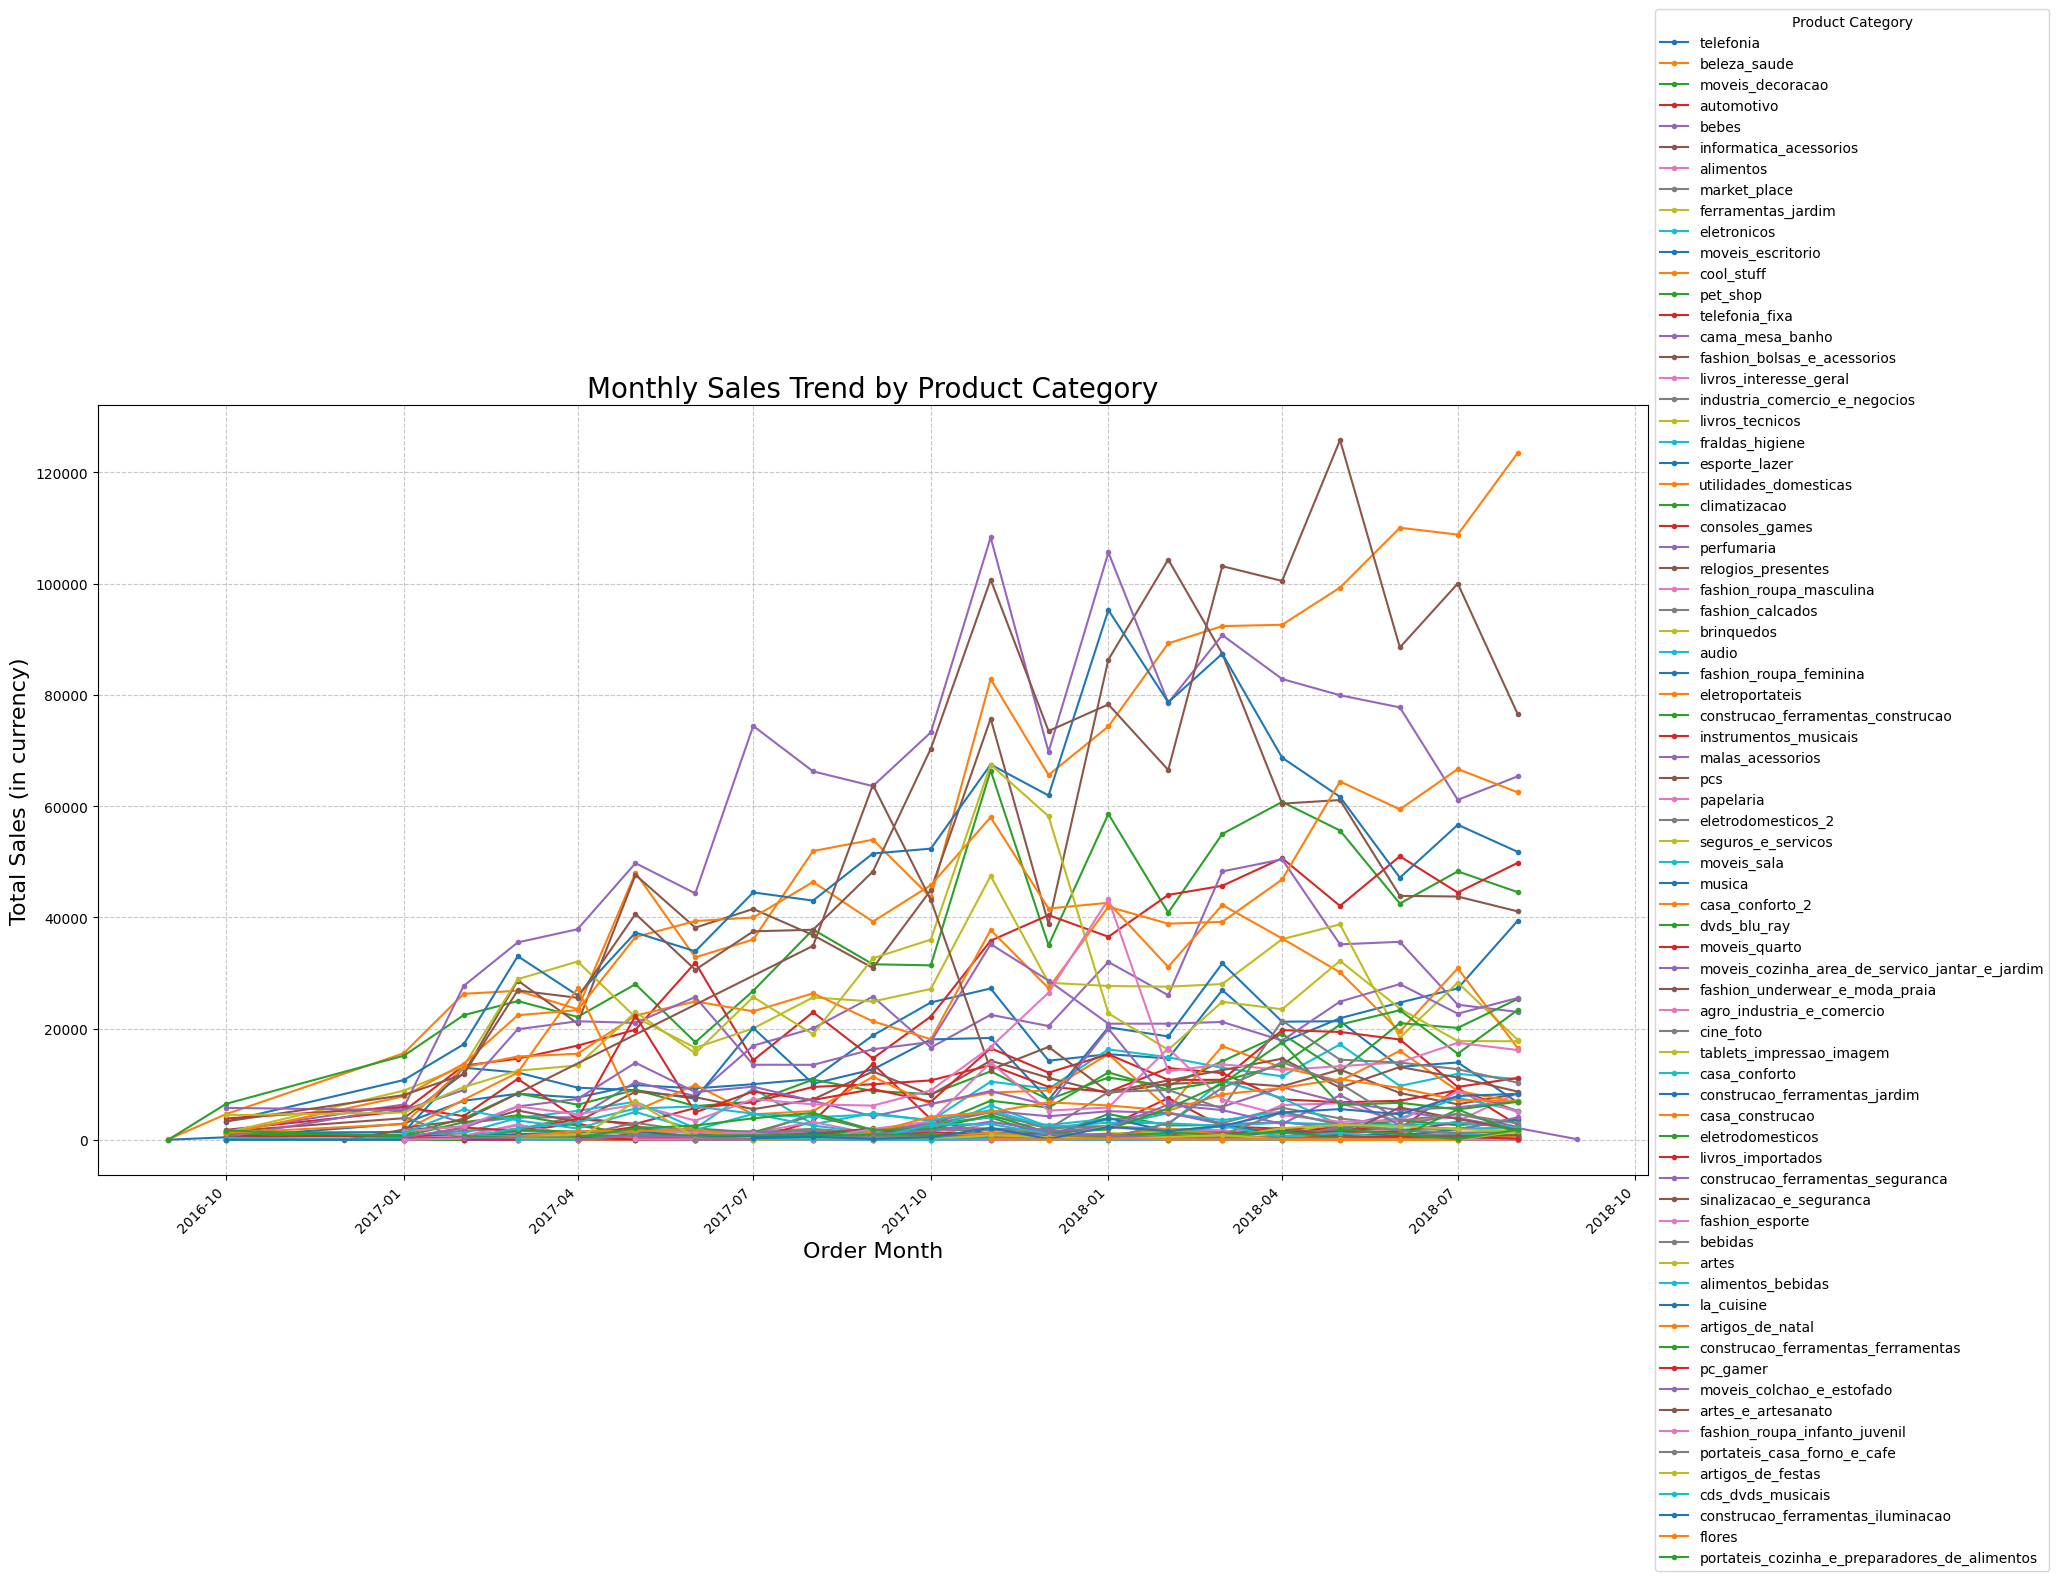

In [111]:
plt.figure(figsize=(20, 10))


monthly_sales_trend['order_month'] = monthly_sales_trend['order_month'].dt.to_timestamp()

monthly_sales_trend = monthly_sales_trend.sort_values('order_month')

for category in monthly_sales_trend['product_category_name'].unique():
    category_data = monthly_sales_trend[monthly_sales_trend['product_category_name'] == category]
    plt.plot(category_data['order_month'], category_data['price'], label=category, marker='o', markersize=3)

plt.title('Monthly Sales Trend by Product Category', fontsize=20)
plt.xlabel('Order Month', fontsize=16)
plt.ylabel('Total Sales (in currency)', fontsize=16)



plt.xticks(rotation=45, ha='right')


plt.grid(True, linestyle='--', alpha=0.7, axis='both')


plt.legend(title='Product Category', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.show()

### Kategori produk manakah yang menghasilkan rata-rata penjualan tertinggi?

cell dibawah  menunjukan rata rata penjualan untuk setiap kategori produk

In [112]:
average_sales = all_df.groupby('product_category_name')['price'].mean().reset_index()
category_sales = average_sales.sort_values(by='price', ascending=False)

category_sales.head()


,product_category_name,price
61,pcs,1103.689136
64,portateis_casa_forno_e_cafe,627.509103
29,eletrodomesticos_2,457.529481
0,agro_industria_e_comercio,332.706151
45,instrumentos_musicais,293.398651


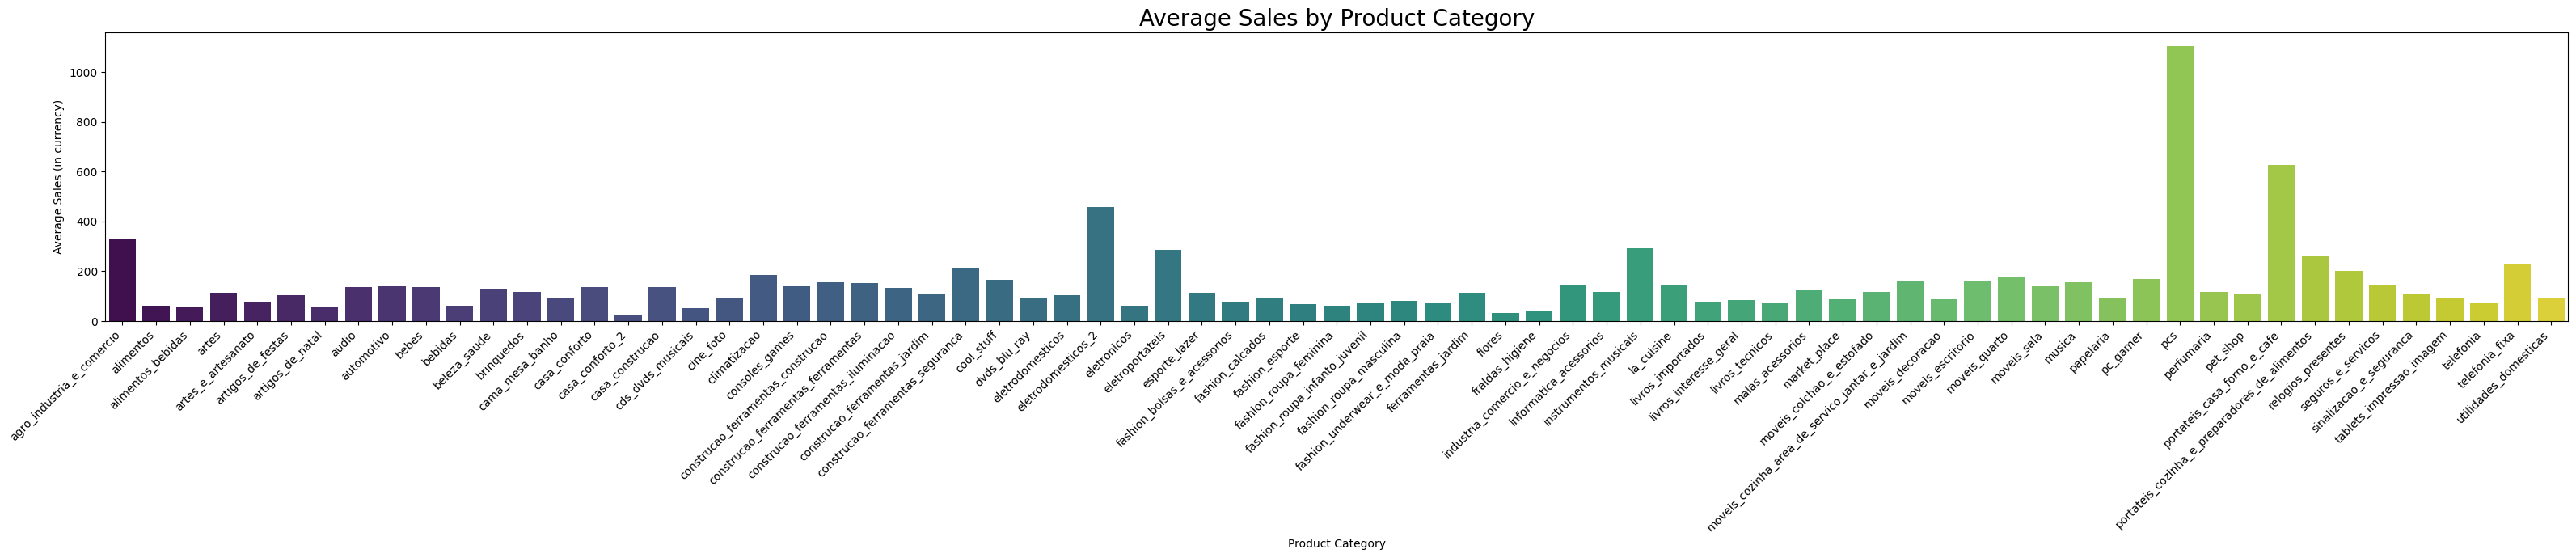

In [113]:
plt.figure(figsize=(32, 7))
sns.barplot(data=average_sales, x='product_category_name', y='price', palette='viridis')
plt.title('Average Sales by Product Category', fontsize=20)
plt.xlabel('Product Category')
plt.ylabel('Average Sales (in currency)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analysis Lanjutan (Opsional)

### RFM Analysis

In [114]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


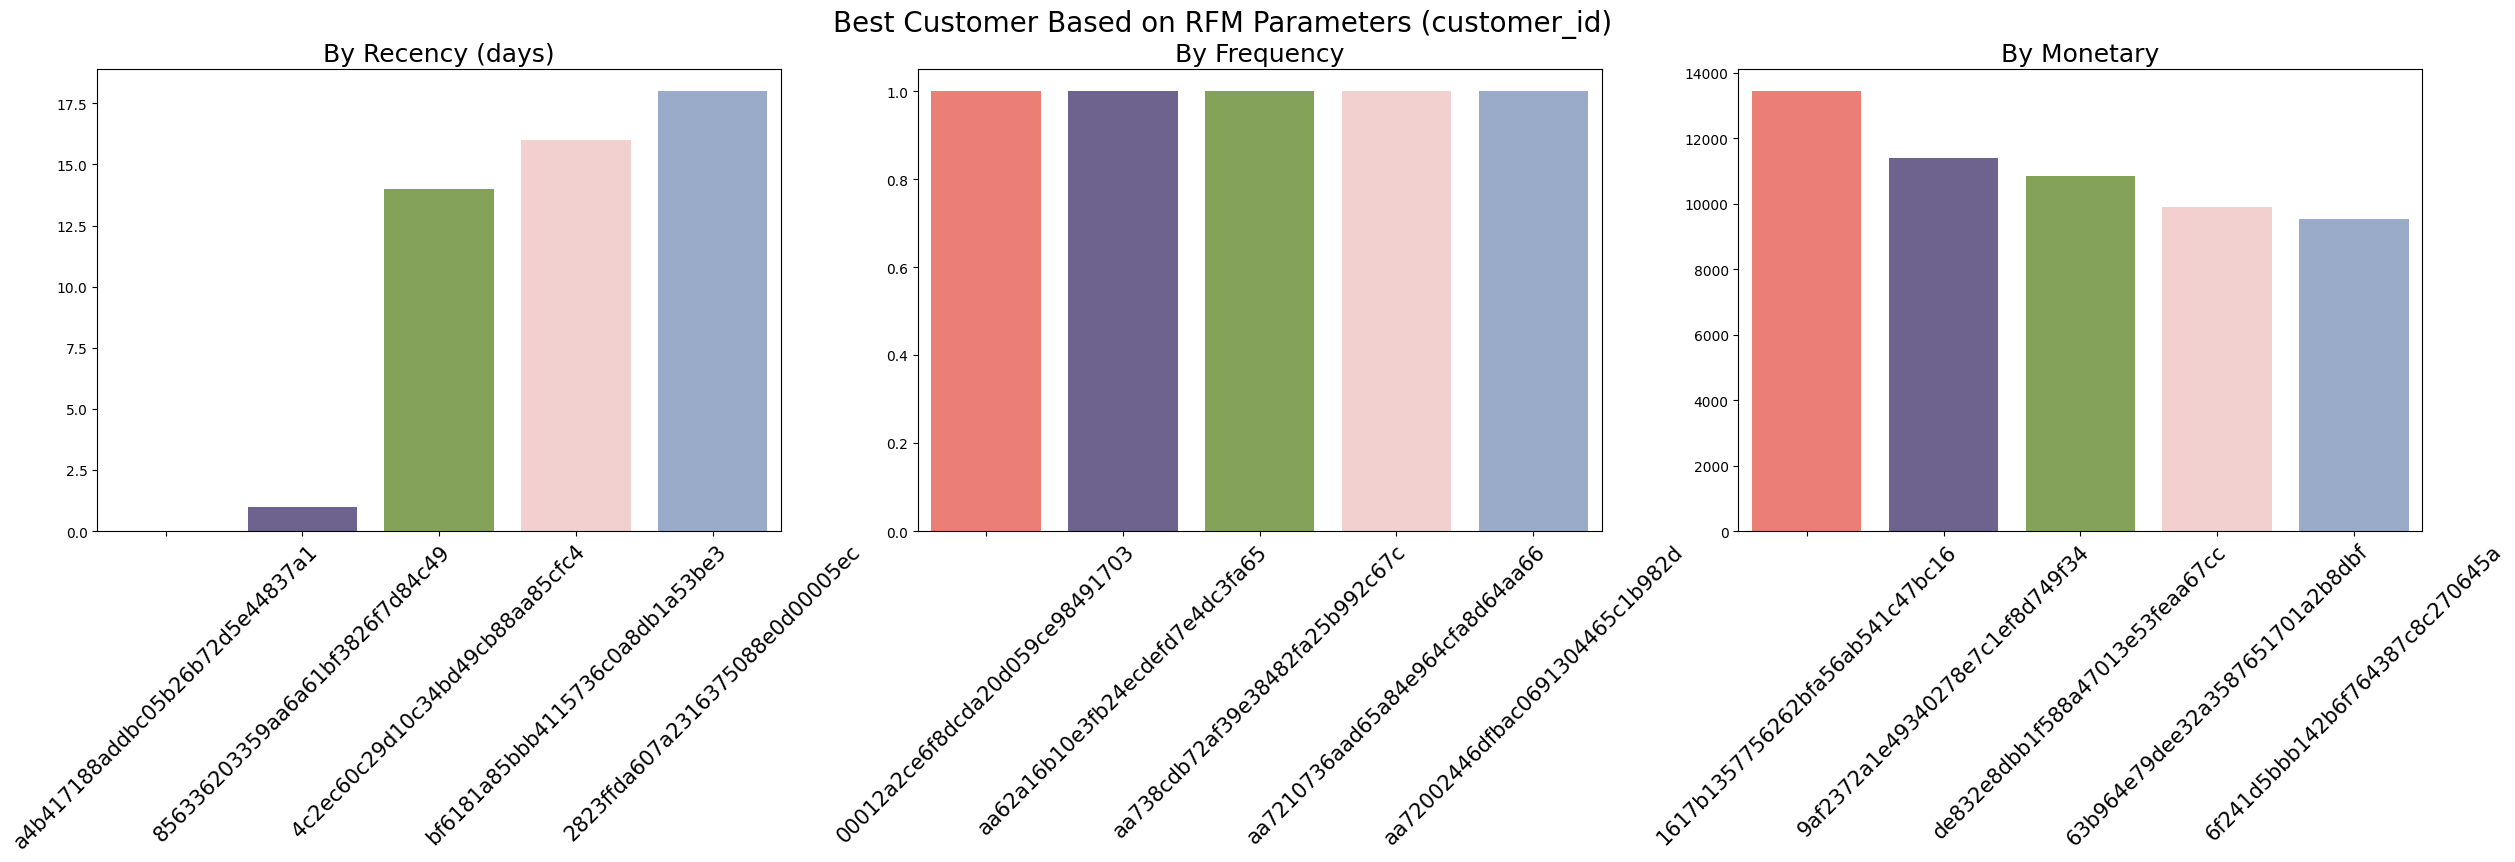

In [115]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1"]
 
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, labelrotation=45)
 
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, labelrotation=45)
 
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, labelrotation=45)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

### Conclusion pertanyaan 1 (Bagaimana tren penjualan bulanan di berbagai kategori produk?)
Berdasarkan diagram garis yang dibuat, kita dapat melihat total penjualan dari waktu ke waktu untuk berbagai kategori produk. Sumbu x mewakili bulan pemesanan dari tahun 2016 hingga pertengahan 2018, sedangkan sumbu y mewakili jumlah total harga penjualan. Dalam diagram tersebut terdiri dari beberapa garis berwarna yang masing-masing mewakili kategori produk berbeda, seperti yang ditunjukkan oleh legenda di sisi kanan. Tren ini menunjukkan peningkatan penjualan yang stabil di berbagai kategori dengan fluktuasi dan puncak yang cukup besar, terutama terlihat pada pertengahan hingga akhir tahun 2017 dan awal tahun 2018. Kategori seperti "beleza_saude", "bebes", dan "moveis_decoracao" tampaknya menunjukkan penjualan keseluruhan yang lebih tinggi dibandingkan dengan yang lain. Sedangkan untuk top 3 produk yang memiliki penjualan tertinggi(peak)yaitu relogios presentes pada tanggal 2018 Mei dengan total penjualan 125788.46 dolar.selanjutnya yaitu produk beleza saude pada tanggal 2018 dari bulan Juni hingga Agustus dengan penjualan 110025.34 dolar, 108797.08 dolar, dan 123448.50 dolar secara berurutan. Terakhir adalah produk cama mesa banho pada tanggal 2017 bulan November dengan penjualan sebesar 108300.86 dolar.

### Conclusion pertanyaan 2 (Kategori produk manakah yang menghasilkan rata-rata penjualan tertinggi?)
Berdasarkan diagram batang berjudul yang dibuat, kita dapat melihar penjualan rata rata menurut kategori produk, yang mewakili jumlah penjualan rata-rata  untuk setiap kategori produk. Sumbu x mencantumkan kategori produk, sedangkan sumbu y menunjukkan jumlah penjualan rata-rata, dengan nilai berkisar dari 0 hingga lebih dari 1000 dolar. Diagram batang ini menunjukkan variasi yang signifikan dalam rata-rata penjualan di seluruh kategori. Khususnya, kategori seperti "pcs", "portateis_cozinha_e_preparadores_de_alimentos", dan "pet_shop" menunjukkan rata-rata penjualan yang lebih tinggi, dengan "pcs" memiliki rata-rata nilai penjualan tertinggi, melebihi 1000. Banyak kategori lain yang memiliki rata-rata yang relatif lebih rendah, umumnya di bawah 200 dolar, menunjukkan performa penjualan yang lebih rendah .

In [116]:
all_df.to_csv("all_data.csv", index=False)